# R语言学习笔记

## 基本语法



In [5]:
#变量赋值
a<-2
a->b
print(b)


[1] 2


## 常用函数

In [6]:
#getwd获取当期工作目录
print(getwd())

[1] "/home/hadoop/文档/KaggleCustomer"


## 数据接口


### 读取csv

In [7]:
rpath <- '../forecasting-resteruant-consumer/'
path_air_visit_data = '../forecasting-resteruant-consumer/air_visit_data.csv'

In [8]:
#read.csv 默认为frame格式（与pandas类似）
air_visit_data <- read.csv(path_air_visit_data)


### 加载包

In [9]:
library('tibble')#tibble为dadaframe的升级塑造版，保留了dataframe的优点。更好的打印功能
library('data.table') #快速读取大文件
library('stringr')#处理字符串
library('ggplot2') # visualisation
library('scales') # visualisation
library('grid') # visualisation
library('gridExtra') # visualisation
library('RColorBrewer') # visualisation
library('corrplot') # visualisation

# general data manipulation
library('dplyr') # data manipulation
library('readr') # input/output
library('data.table') # data manipulation
library('tibble') # data wrangling
library('tidyr') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation

# specific visualisation
library('ggfortify') # visualisation
#library('ggrepel') # visualisation
library('ggridges') # visualisation
library('ggExtra') # visualisation
#library('ggforce') # visualisation
library('viridis') # visualisation

# specific data manipulation
library('lazyeval') # data wrangling
library('broom') # data wrangling
library('purrr') # string manipulation

# Date plus forecast
library('lubridate') # date and time
library('timeDate') # date and time
library('tseries') # time series analysis
library('forecast') # time series analysis
#library('prophet') # time series analysis
#library('timetk') # time series analysis

# Maps / geospatial
#library('geosphere') # geospatial locations
library('leaflet') # maps
library('leaflet.extras') # maps
library('maps') # maps


In [10]:
#两种都ok
air_visits <- as.tibble(air_visit_data)#data.frame直接装换为tibble
air_visits <- as.tibble(fread(str_c(rpath,'air_visit_data.csv')))


### frame常用函数

In [11]:
#max：选出最大值
vis_max <- max(air_visit_data['visitors'])
print(vis_max)
#选出符合条件数据的全部信息
ret_val <- subset(air_visit_data,visitors==max(visitors))
print (ret_val)

[1] 877
              air_store_id visit_date visitors
85315 air_cfdeb326418194ff 2017-03-08      877


## 数据分析

In [12]:
air_visits <- as.tibble(fread(str_c(rpath,'air_visit_data.csv')))
air_reserve <- as.tibble(fread(str_c(rpath,'air_reserve.csv')))
hpg_reserve <- as.tibble(fread(str_c(rpath,'hpg_reserve.csv')))
air_store <- as.tibble(fread(str_c(rpath,'air_store_info.csv')))
hpg_store <- as.tibble(fread(str_c(rpath,'hpg_store_info.csv')))
holidays <- as.tibble(fread(str_c(rpath,'date_info.csv')))
store_ids <- as.tibble(fread(str_c(rpath,'store_id_relation.csv')))
test <- as.tibble(fread(str_c(rpath,'sample_submission.csv')))

In [13]:
print (store_ids)

# A tibble: 150 x 2
           air_store_id         hpg_store_id
                  <chr>                <chr>
 1 air_63b13c56b7201bd9 hpg_4bc649e72e2a239a
 2 air_a24bf50c3e90d583 hpg_c34b496d0305a809
 3 air_c7f78b4f3cba33ff hpg_cd8ae0d9bbd58ff9
 4 air_947eb2cae4f3e8f2 hpg_de24ea49dc25d6b8
 5 air_965b2e0cf4119003 hpg_653238a84804d8e7
 6 air_a38f25e3399d1b25 hpg_50378da9ffb9b6cd
 7 air_3c938075889fc059 hpg_349b1b92f98b175e
 8 air_68301bcb11e2f389 hpg_2c09f3abb2220659
 9 air_5f6fa1b897fe80d5 hpg_40aff6385800ebb1
10 air_00a91d42b08b08d9 hpg_fbe603376b5980fc
# ... with 140 more rows


### 查看数据全貌

In [14]:
print (summary(air_visits))

 air_store_id        visit_date           visitors     
 Length:252108      Length:252108      Min.   :  1.00  
 Class :character   Class :character   1st Qu.:  9.00  
 Mode  :character   Mode  :character   Median : 17.00  
                                       Mean   : 20.97  
                                       3rd Qu.: 29.00  
                                       Max.   :877.00  


### 格式转换（日期）

#### 加载数据清洗 整理包

In [15]:
library('dplyr')
library('lubridate')#日期处理
library('ggplot2')

In [16]:
air_visits <- air_visits %>% mutate(visit_date = ymd(visit_date))
print(air_visits)#'visit_date 转换为date格式'

# A tibble: 252,108 x 3
           air_store_id visit_date visitors
                  <chr>     <date>    <int>
 1 air_ba937bf13d40fb24 2016-01-13       25
 2 air_ba937bf13d40fb24 2016-01-14       32
 3 air_ba937bf13d40fb24 2016-01-15       29
 4 air_ba937bf13d40fb24 2016-01-16       22
 5 air_ba937bf13d40fb24 2016-01-18        6
 6 air_ba937bf13d40fb24 2016-01-19        9
 7 air_ba937bf13d40fb24 2016-01-20       31
 8 air_ba937bf13d40fb24 2016-01-21       21
 9 air_ba937bf13d40fb24 2016-01-22       18
10 air_ba937bf13d40fb24 2016-01-23       26
# ... with 252,098 more rows


In [17]:
air_visits <- air_visits %>% 
  mutate(visit_date = ymd(visit_date))

air_reserve <- air_reserve %>%
  mutate(visit_datetime = ymd_hms(visit_datetime),
         reserve_datetime = ymd_hms(reserve_datetime))

hpg_reserve <- hpg_reserve %>%
  mutate(visit_datetime = ymd_hms(visit_datetime),
         reserve_datetime = ymd_hms(reserve_datetime))

air_store <- air_store %>%
  mutate(air_genre_name = as.factor(air_genre_name),
         air_area_name = as.factor(air_area_name))

hpg_store <- hpg_store %>%
  mutate(hpg_genre_name = as.factor(hpg_genre_name),
         hpg_area_name = as.factor(hpg_area_name))

holidays <- holidays %>%
  mutate(holiday_flg = as.logical(holiday_flg),
         date = ymd(calendar_date))


In [18]:
print (holidays)

# A tibble: 517 x 4
   calendar_date day_of_week holiday_flg       date
           <chr>       <chr>       <lgl>     <date>
 1    2016-01-01      Friday        TRUE 2016-01-01
 2    2016-01-02    Saturday        TRUE 2016-01-02
 3    2016-01-03      Sunday        TRUE 2016-01-03
 4    2016-01-04      Monday       FALSE 2016-01-04
 5    2016-01-05     Tuesday       FALSE 2016-01-05
 6    2016-01-06   Wednesday       FALSE 2016-01-06
 7    2016-01-07    Thursday       FALSE 2016-01-07
 8    2016-01-08      Friday       FALSE 2016-01-08
 9    2016-01-09    Saturday       FALSE 2016-01-09
10    2016-01-10      Sunday       FALSE 2016-01-10
# ... with 507 more rows


In [19]:
print (air_visits)

# A tibble: 252,108 x 3
           air_store_id visit_date visitors
                  <chr>     <date>    <int>
 1 air_ba937bf13d40fb24 2016-01-13       25
 2 air_ba937bf13d40fb24 2016-01-14       32
 3 air_ba937bf13d40fb24 2016-01-15       29
 4 air_ba937bf13d40fb24 2016-01-16       22
 5 air_ba937bf13d40fb24 2016-01-18        6
 6 air_ba937bf13d40fb24 2016-01-19        9
 7 air_ba937bf13d40fb24 2016-01-20       31
 8 air_ba937bf13d40fb24 2016-01-21       21
 9 air_ba937bf13d40fb24 2016-01-22       18
10 air_ba937bf13d40fb24 2016-01-23       26
# ... with 252,098 more rows


In [20]:
print(summarise(group_by(air_visits,visit_date),sum(visitors)))
#summary()是一个基础包中的重要统计描述函数，同样的在dplyr中summarise()函数也可以对数据进行统计描述。

# A tibble: 478 x 2
   visit_date `sum(visitors)`
       <date>           <int>
 1 2016-01-01            1033
 2 2016-01-02            1764
 3 2016-01-03            2368
 4 2016-01-04            3326
 5 2016-01-05            3927
 6 2016-01-06            4154
 7 2016-01-07            4431
 8 2016-01-08            6115
 9 2016-01-09            7306
10 2016-01-10            6066
# ... with 468 more rows


In [21]:
#统计每天的消费人数，还可以这样写
p1 <- air_visits %>%
  group_by(visit_date) %>%
  summarise(all_visitors = sum(visitors))


### 使用ggplot2可视化（ggplot2文档比较全，到时候边看文档边查）

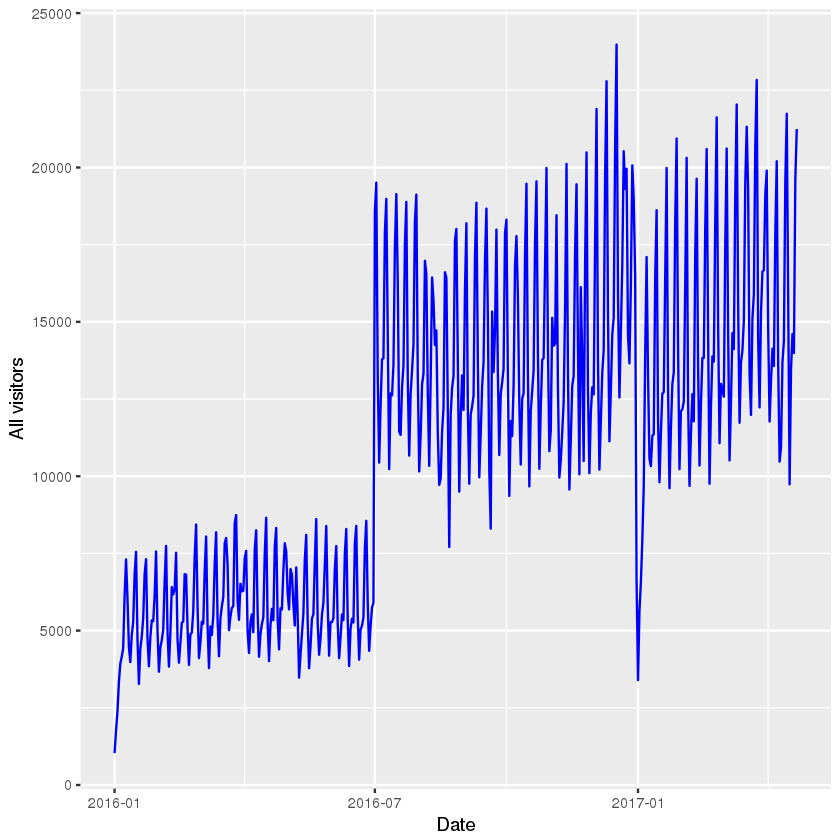

In [22]:
p1 <- ggplot(data = p1,aes(visit_date,all_visitors)) +
  geom_line(col = "blue") +
  labs(y = "All visitors", x = "Date")
print (p1)

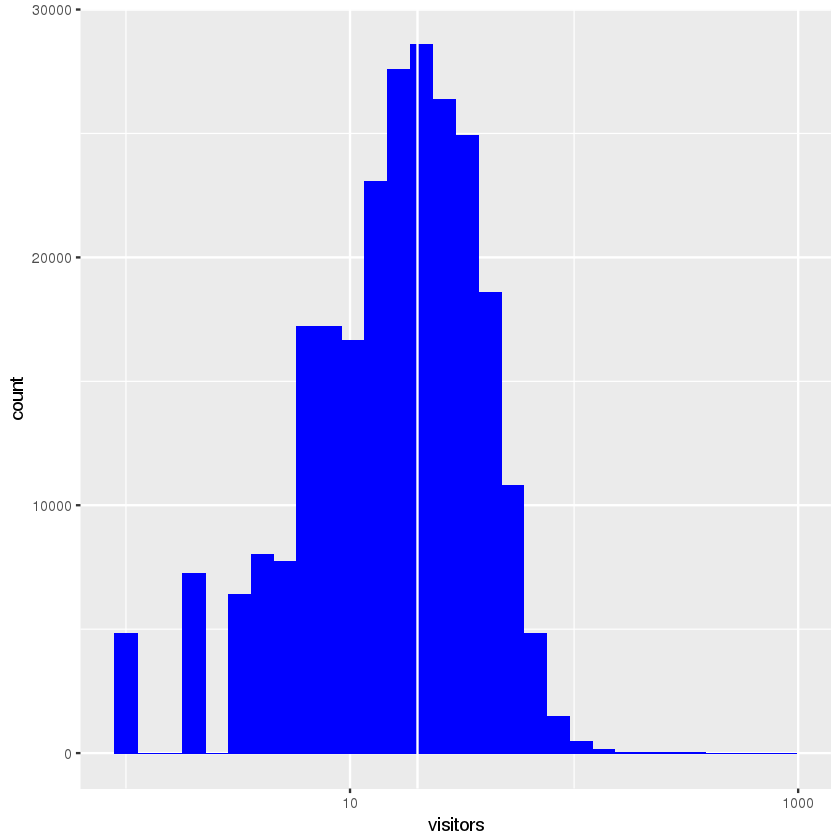

In [23]:
#直方图
p2 <- ggplot(data = air_visits,aes(visitors))+
    geom_histogram(fill='blue',bins = 30)+
    geom_vline(xintercept = 20, color = "white")+
    scale_x_log10()
print (p2)

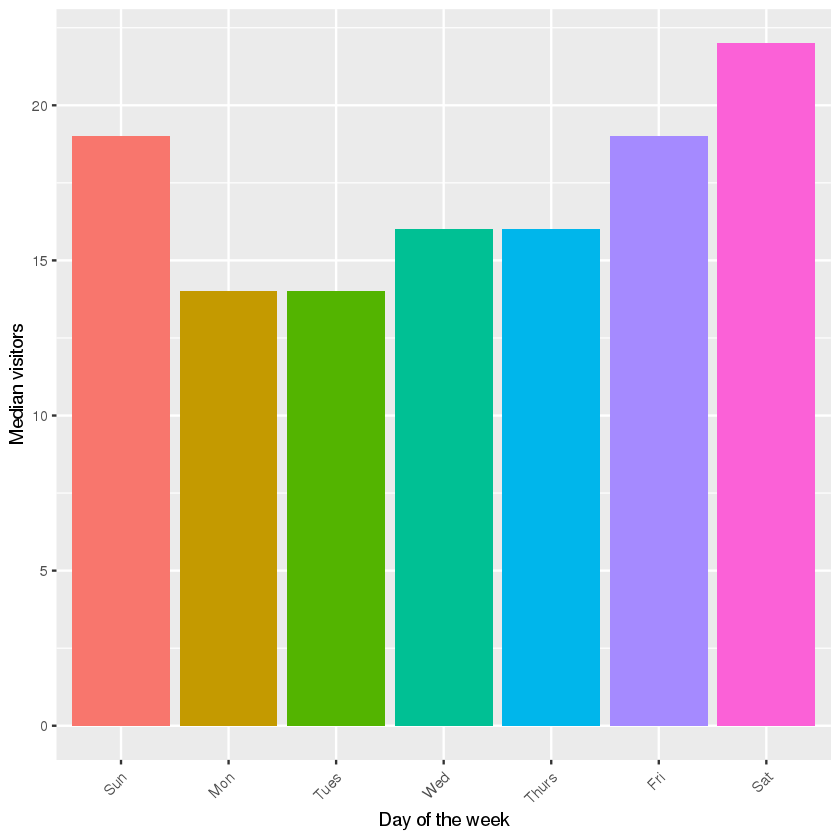

In [24]:
p3 <- air_visits %>%
  mutate(wday = wday(visit_date, label = TRUE)) %>%
  group_by(wday) %>%
  summarise(visits = median(visitors)) %>%
  ggplot(aes(wday, visits, fill = wday)) +
  geom_col() +
  theme(legend.position = "none", axis.text.x  = element_text(angle=45, hjust=1, vjust=0.9)) +
  labs(x = "Day of the week", y = "Median visitors")
print(p3)

In [25]:
p4 <- air_visits %>%
      mutate(month = month(visit_date,label = TRUE)) %>%
      group_by(month) %>%
      summarise(median = median(visitors)) %>%
      ggplot(aes(x = month,y = median,fill=month))+
      geom_col()+
      labs(x='months',y='median')+
      theme(legend.position = 'none')


In [26]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }
    
if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

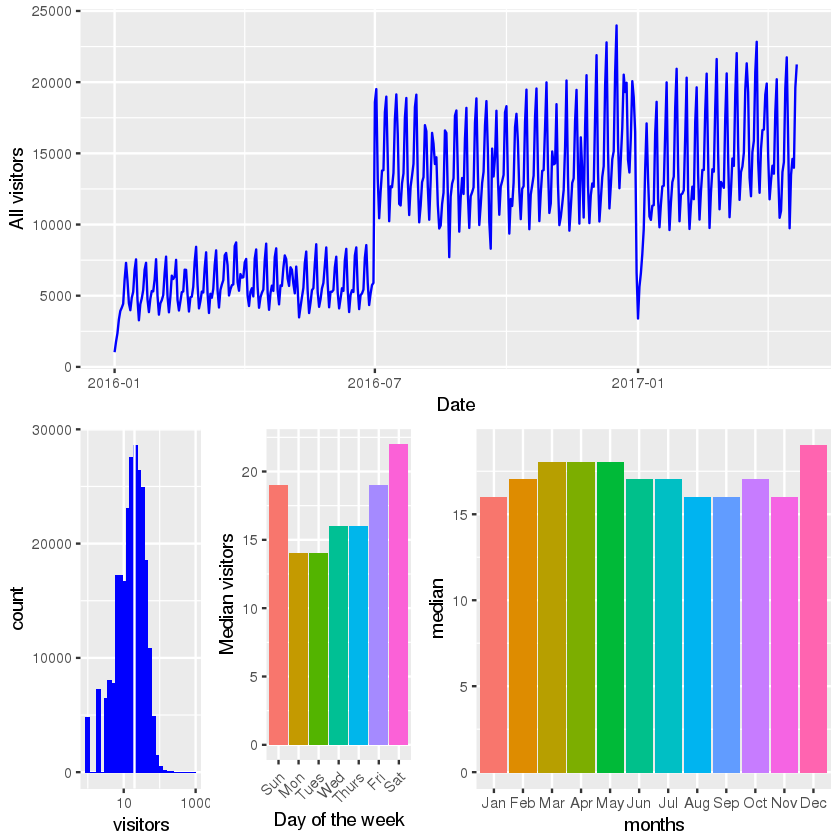

In [27]:
layout <- matrix(c(1,1,1,1,2,3,4,4),2,4,byrow=TRUE)
multiplot(p1,p2,p3,p4,layout=layout)

In [28]:
library('grid')


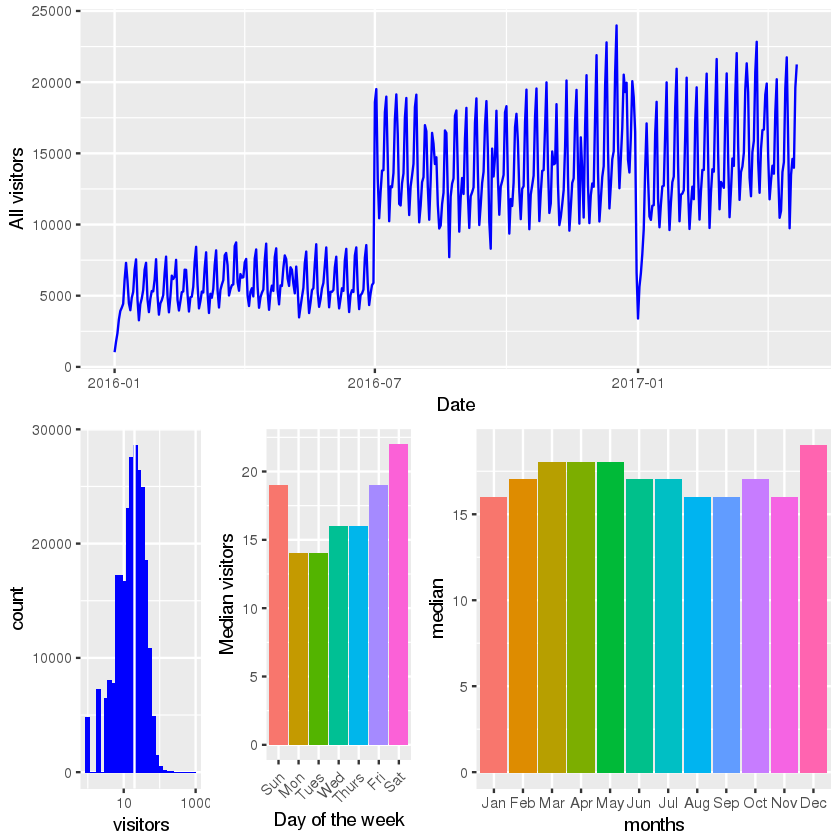

In [29]:
grid.newpage()
pushViewport(viewport(layout = grid.layout(2,4)))
vplayput <- function(x,y){
        viewport(layout.pos.row = x,layout.pos.col = y)
}

print(p1,vp=vplayput(1,1:4))
print(p2,vp=vplayput(2,1))
print(p3,vp=vplayput(2,2))
print(p4,vp=vplayput(2,3:4))

We find:

+ There is an interesting long-term step structure in the overall time series. This might be related to new restaurants being added to the data base. In addition, we already see a periodic pattern that most likely corresponds to a weekly cycle.

+ The number of guests per visit per restaurant per day peaks at around 20 (the orange line). The distribution extends up to 100 and, in rare cases, beyond.

+ Friday and the weekend appear to be the most popular days; which is to be expected. Monday and Tuesday have the lowest numbers of average visitors.

+ Also during the year there is a certain amount of variation. Dec appears to be the most popular month for restaurant visits. The period of Mar - May is consistently busy.

 We will be forecasting for the last week of April plus May 2017, so let’s look at this time range in our 2016 training data:

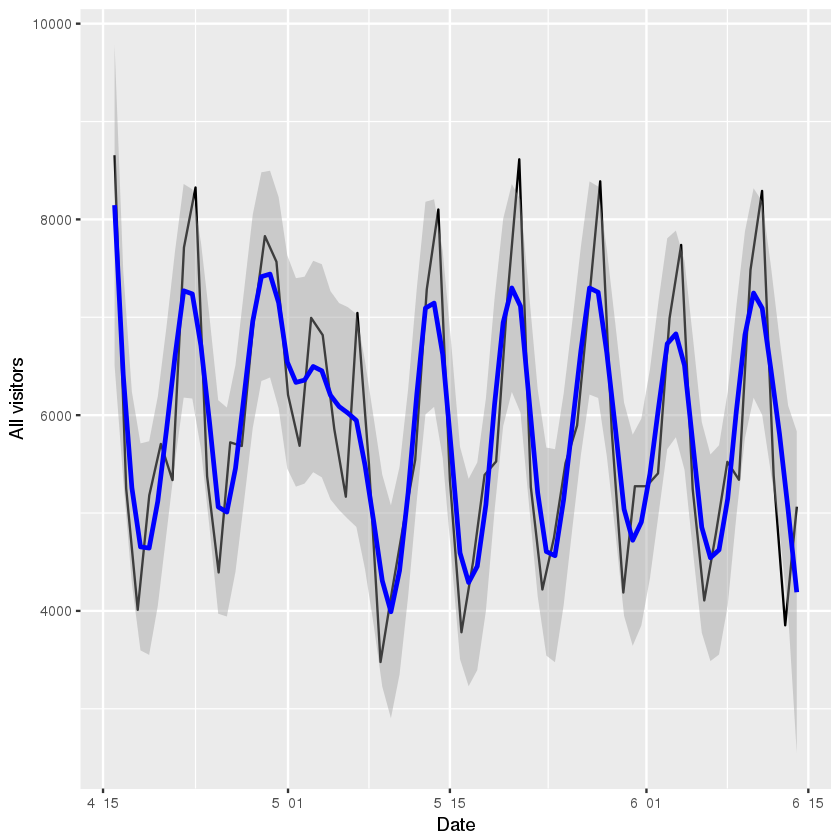

In [30]:
air_visits %>%
  filter(visit_date > ymd("2016-04-15") & visit_date < ymd("2016-06-15")) %>%
  group_by(visit_date) %>%
  summarise(all_visitors = sum(visitors)) %>%
  ggplot(aes(visit_date,all_visitors)) +
  geom_line() +
  geom_smooth(method = "loess", color = "blue", span = 1/7) +
  labs(y = "All visitors", x = "Date")

### 4.2 Air Reservations
Let’s see how our reservations data compares to the actual visitor numbers. We start with the air restaurants and visualise their visitor volume through reservations for each day, alongside the hours of these visits and the time between making a reservation and visiting the restaurant:

In [31]:
print (air_reserve)

# A tibble: 92,378 x 4
           air_store_id      visit_datetime    reserve_datetime
                  <chr>              <dttm>              <dttm>
 1 air_877f79706adbfb06 2016-01-01 19:00:00 2016-01-01 16:00:00
 2 air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00
 3 air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00
 4 air_877f79706adbfb06 2016-01-01 20:00:00 2016-01-01 16:00:00
 5 air_db80363d35f10926 2016-01-01 20:00:00 2016-01-01 01:00:00
 6 air_db80363d35f10926 2016-01-02 01:00:00 2016-01-01 16:00:00
 7 air_db80363d35f10926 2016-01-02 01:00:00 2016-01-01 15:00:00
 8 air_3bb99a1fe0583897 2016-01-02 16:00:00 2016-01-02 14:00:00
 9 air_3bb99a1fe0583897 2016-01-02 16:00:00 2016-01-01 20:00:00
10 air_2b8b29ddfd35018e 2016-01-02 17:00:00 2016-01-02 17:00:00
# ... with 92,368 more rows, and 1 more variables: reserve_visitors <int>


In [32]:
foo <- air_reserve %>%
    mutate(reserve_date = date(reserve_datetime),
           reserve_hour = hour(reserve_datetime),
           reserve_wday = wday(reserve_datetime,label = TRUE),
           visit_date = date(visit_datetime),
           visit_hour = hour(visit_datetime),
           visit_wday = wday(visit_date,label = TRUE),
           diff_hour = time_length(visit_datetime-reserve_datetime,unit = 'hour'),
           diff_day = time_length(visit_datetime-reserve_datetime,unit = 'day')
           )

In [33]:
p1 <- foo %>%
    group_by(visit_date) %>%
    summarise(visitors=sum(reserve_visitors)) %>%
    ggplot(aes(x = visit_date,y = visitors))+
    geom_line()+
    labs(x='Air visit date',y='All Reservation Visotors')

p2 <- foo %>%
    group_by(visit_hour) %>%
    summarise(visitors = sum(reserve_visitors)) %>%
    ggplot(aes(x = visit_hour,y = visitors))+
    geom_col(fill='blue')+
    labs(x='Visit Hour(24 hours in one day)',y='All Reservation Visitors')

p3 <- foo %>%
    filter(diff_hour < 24*5) %>%
    group_by(diff_hour) %>%
    summarise(visitors=sum(reserve_visitors)) %>%
    ggplot(aes(x = diff_hour,y = visitors))+
    geom_col(fill='red')+
    labs(x='time(hour) from reservation to visitors')

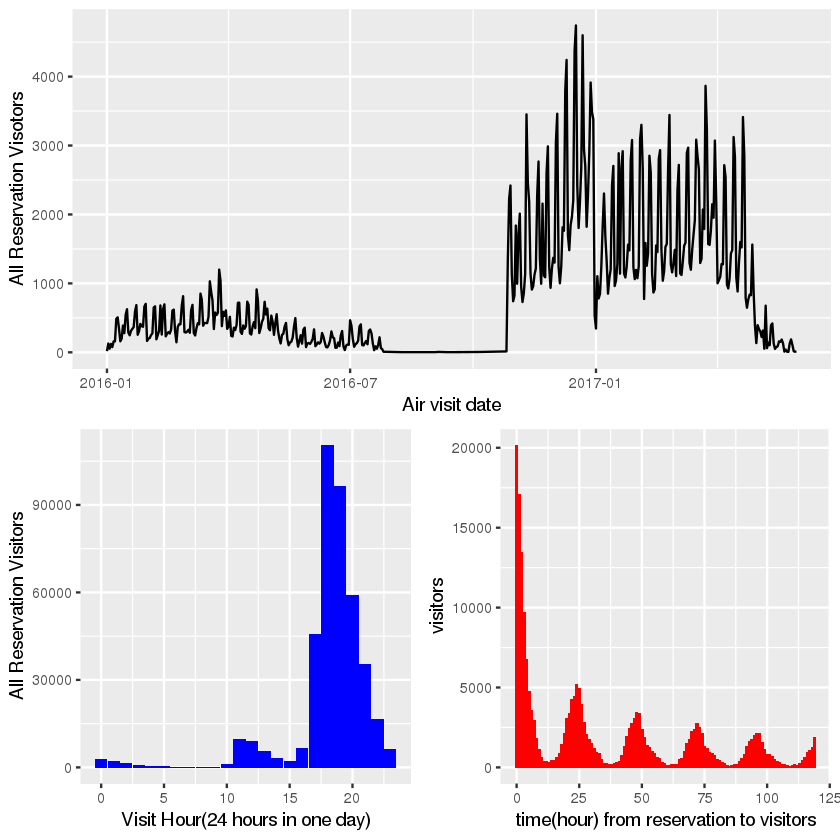

In [34]:
grid.newpage()
pushViewport(viewport(layout = grid.layout(2,4)))
vplayput <- function(x,y){
        viewport(layout.pos.row = x,layout.pos.col = y)
}

print(p1,vp=vplayput(1,1:4))
print(p2,vp=vplayput(2,1:2))
print(p3,vp=vplayput(2,3:4))

We find:

+ There were much fewer reservations made in 2016 through the air system; even none at all for a long stretch of time. The volume only increased during the end of that year. In 2017 the visitor numbers stayed strong. The artifical decline we see after the first quarter is most likely related to these reservations being at the end of the training time frame, which means that long-term reservations would not be part of this data set.

+ Reservations are made typically for the dinner hours in the evening.

+ The time, here shown in hours, between making a reservation and visiting the restaurant follow a nice 24-hour pattern. The most popular strategy is to reserve a couple of hours before the visit, but if the reservation is made more in advance then it seems to be common to book a table in the evening for one of the next evenings. This plot is truncated to show this pattern, which continues towards longer time scales. Very long time gaps between reservation and visit are not uncommon. Those are the most extreme values for the air data, up to more than a year in advance:

### 4.3 HPG Reservations
n the same style as above, here are the hpg reservations:

In [35]:
#print (hpg_reserve)
glimpse(hpg_reserve)

Observations: 2,000,320
Variables: 4
$ hpg_store_id     <chr> "hpg_c63f6f42e088e50f", "hpg_dac72789163a3f47", "h...
$ visit_datetime   <dttm> 2016-01-01 11:00:00, 2016-01-01 13:00:00, 2016-01...
$ reserve_datetime <dttm> 2016-01-01 09:00:00, 2016-01-01 06:00:00, 2016-01...
$ reserve_visitors <int> 1, 3, 2, 5, 13, 2, 2, 2, 2, 6, 2, 2, 2, 2, 5, 4, 2...


In [36]:
hpg_foo <- hpg_reserve %>%
    mutate(reserve_date = date(reserve_datetime),
           reserve_hour = hour(reserve_datetime),
           visit_date = date(visit_datetime),
           visit_hour = hour(visit_datetime),
           diff_hour = time_length(visit_datetime-reserve_datetime,unit = 'hour'),
           diff_day = time_length(visit_datetime-reserve_datetime,unit = 'day')
          )

In [37]:
print (hpg_foo[1:4,5:10])

# A tibble: 4 x 6
  reserve_date reserve_hour visit_date visit_hour diff_hour   diff_day
        <date>        <int>     <date>      <int>     <dbl>      <dbl>
1   2016-01-01            9 2016-01-01         11         2 0.08333333
2   2016-01-01            6 2016-01-01         13         7 0.29166667
3   2016-01-01           14 2016-01-01         16         2 0.08333333
4   2016-01-01           11 2016-01-01         17         6 0.25000000


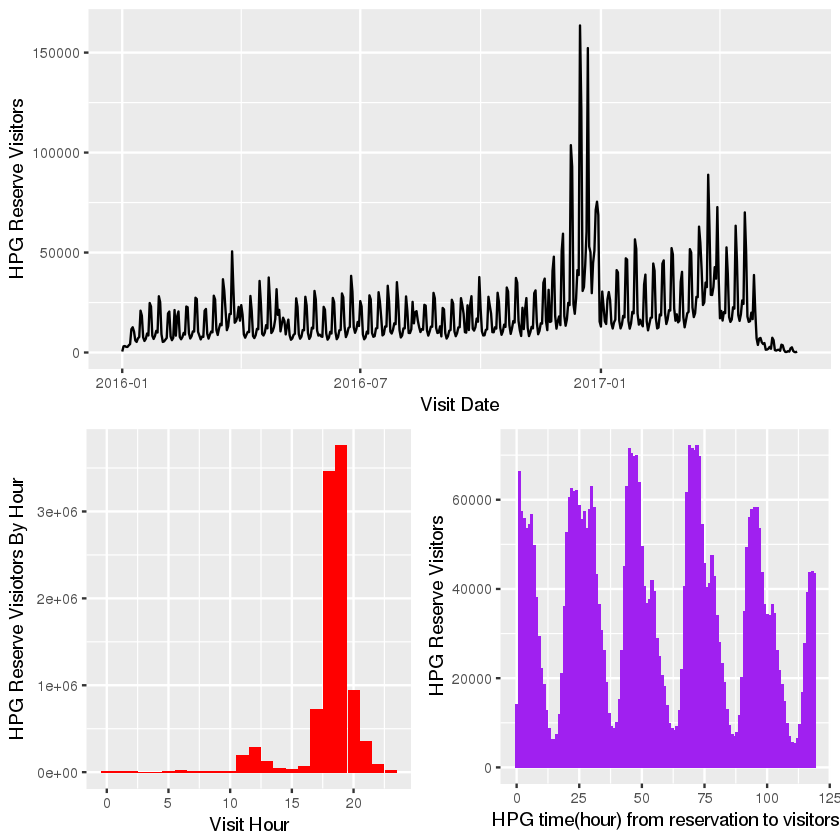

In [38]:
p1 <- hpg_foo %>%
    group_by(visit_date) %>%
    summarise(hpg_reserve_visitors = sum(reserve_visitors)) %>%
    ggplot(aes(x = visit_date,y = hpg_reserve_visitors))+
    geom_line()+
    labs(x='Visit Date',y='HPG Reserve Visitors')

p2 <- hpg_foo %>%
    group_by(visit_hour) %>%
    summarise(hpg_reserve_visitors=sum(reserve_visitors)) %>%
    ggplot(aes(x = visit_hour,y = hpg_reserve_visitors))+
    geom_col(fill='red')+
    labs(x='Visit Hour',y='HPG Reserve Visiotors By Hour')

p3 <- hpg_foo %>%
    filter(diff_hour<24*5) %>%
    group_by(diff_hour) %>%
    summarise(all_reserve_visitors = sum(reserve_visitors)) %>%
    ggplot(aes(x = diff_hour,y = all_reserve_visitors))+
    geom_col(fill='purple')+
    labs(x='HPG time(hour) from reservation to visitors',
         y='HPG Reserve Visitors')

layout <- matrix(c(1,1,2,3),2,2,byrow=TRUE)
multiplot(p1, p2, p3, layout=layout)

We find:

+ Here the visits after reservation follow a more orderly pattern, with a clear spike in Dec 2016. As above for the air data, we also see reservation visits dropping off as we get closer to the end of the time frame.

+ Again, most reservations are for dinner, and we see another nice 24-hour pattern for making these reservations. It’s worth noting that here the last few hours before the visit don’t see more volume than the 24 or 48 hours before. This is in stark constrast to the air data.

